In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
def get_clean_iris_dataset():
    X, Y = load_iris(as_frame=True,return_X_y=True)
    especies = list(load_iris()["target_names"])
    X["labels"] = Y
    X["labels"] = X["labels"].apply(lambda label: especies[label])
    X.rename(
        {
            X.columns[0]:"sepal_length",
            X.columns[1]:"sepal_width",
            X.columns[2]:"petal_length",
            X.columns[3]:"petal_width",
        },
        axis="columns",
        inplace=True
    )
    return X

In [ ]:
X=get_clean_iris_dataset()
X.head()


In [4]:
import matplotlib.pyplot as plt

In [ ]:
fig,ax=plt.subplots(
    figsize=(7,7),nrows=2,ncols=2
)
fig.suptitle("Gráficos de cada característica")

current_ax = 0

colors = ["red","green","blue","orange"]
for feature_name,feature_array in X.items():
    if feature_name=="labels":
        break
    ax = fig.axes[current_ax]

    if current_ax==0:
        ax.plot(
            X["sepal_width"],
            label="sepal_width",
            color="purple",
            marker="x",
            linewidth=.3
        )
    ax.plot(
        feature_array,
        label=feature_name,
        color=colors[current_ax],
        marker="o",
        linewidth=1,
    )
    ax.grid(color="pink",linestyle="-.")
    ax.set_title(feature_name)
    ax.set_ylabel(feature_name)
    ax.set_xlabel("Índice de la muestra")
    ax.legend()
    ax.axis('auto')
    current_ax+=1
fig.tight_layout()

Histograma

In [6]:
import numpy as np
from scipy import stats
import math

In [ ]:

petal_length = X["petal_length"]
min_length,max_length = min(petal_length), max(petal_length)
n_bins = math.ceil((max_length - min_length)/1)

hist = np.histogram(petal_length,bins=n_bins)
hist_dist = stats.rv_histogram(hist,density=True)

plt.hist(petal_length,bins=n_bins,edgecolor="white", density=True,label="Histogram")

eje_x = np.linspace(min_length,max_length,n_bins)
plt.plot(eje_x,hist_dist.pdf(eje_x),label="PDF")

plt.title("Histograma de petal length")
plt.xlabel("Longitudes del pétalo")
plt.ylabel("Número de ocurrencias")
plt.legend()

plt.show()
print(f"Probabilidad the petal length = 3.5:{hist_dist.pdf([3.5,2,1])}")

In [ ]:
counts,edges,bars=plt.hist(petal_length,bins=6,edgecolor="white")
plt.bar_label(bars)
plt.show()

In [ ]:
especie = "setosa"
feature = "sepal_width"

setosa_sepal_width = X[X["labels"] == especie][feature]
_,_,bars = plt.hist(setosa_sepal_width,bins=10,edgecolor="white")
plt.bar_label(bars)
plt.title("Histograma de sepal width para iris setosa")
plt.xlabel("Sepal Width bins")
plt.ylabel("Número de ocurrencias")
plt.show()

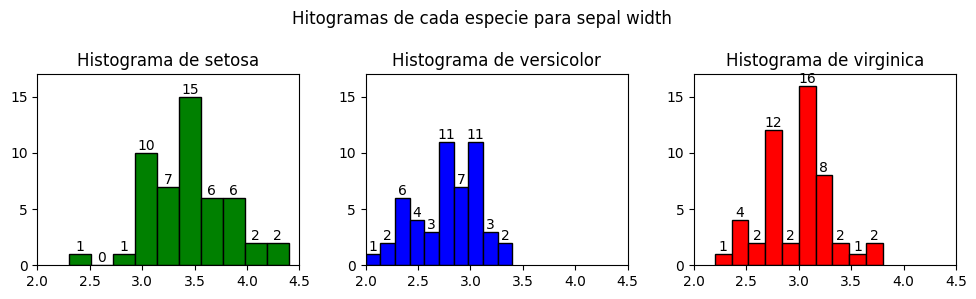

In [13]:
n_species = len(X["labels"].unique())
fg,ax=plt.subplots(
    figsize=(10,3),
    nrows=1,
    ncols=n_species,
)

plt.suptitle("Hitogramas de cada especie para sepal width")

current_ax = 1
colors = ["green","blue","red"]
especies = X["labels"].unique()
feature_name ="sepal_width"

for especie in especies:
    plt.subplot(1,3,current_ax)
    feature = X[X["labels"]==especie][feature_name]

    _,_,bars=plt.hist(
        feature,
        label=feature_name,
        color=colors[current_ax-1],
        linewidth=1,
        edgecolor="black"
    )
    plt.title(f"Histograma de {especie}")
    plt.bar_label(bars)
    current_ax+=1
    plt.xlim(2,4.5)
    plt.ylim(0,17)

plt.tight_layout()

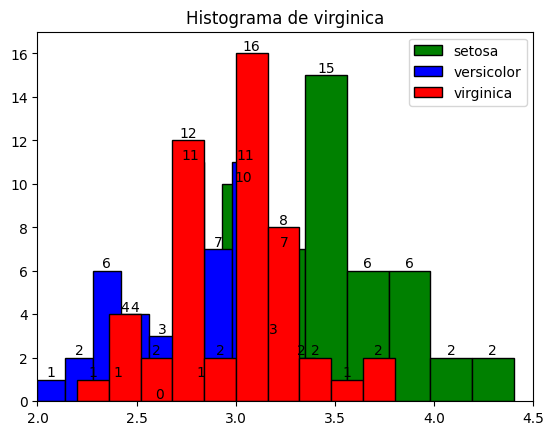

In [15]:
current_ax=1
for especie in especies:
    feature = X[X["labels"]==especie][feature_name]

    _,_,bars=plt.hist(
        feature,
        label=especie,
        color=colors[current_ax-1],
        linewidth=1,
        edgecolor="black"
    )
    plt.title(f"Histograma de {especie}")
    plt.bar_label(bars)
    current_ax+=1
    plt.xlim(2,4.5)
    plt.ylim(0,17)
    plt.legend()